<a href="https://colab.research.google.com/github/RiteshopShrivastava/Gold-Price-forecasting/blob/main/Gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
!pip install yfinance

In [72]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import date
import plotly.express as px
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [73]:
start='2018-01-01'
end=date.today().strftime('%Y-%m-%d')
data=yf.download('GC=F',start=start,end=end)

[*********************100%***********************]  1 of 1 completed


In [74]:
data=yf.download('GC=F',start=start,end=end)[['Adj Close']]
data

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2018-01-02,1313.699951
2018-01-03,1316.199951
2018-01-04,1319.400024
2018-01-05,1320.300049
2018-01-08,1318.599976
...,...
2021-12-20,1793.699951
2021-12-21,1787.900024
2021-12-22,1801.599976


In [75]:
data.rename(columns={"Adj Close": 'Price'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [76]:
data.head()

,Price
Date,
2018-01-02,1313.699951
2018-01-03,1316.199951
2018-01-04,1319.400024
2018-01-05,1320.300049
2018-01-08,1318.599976


In [77]:
data.tail()

,Price
Date,
2021-12-20,1793.699951
2021-12-21,1787.900024
2021-12-22,1801.599976
2021-12-23,1811.199951
2021-12-27,1808.099976


## **EDA**

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1004 entries, 2018-01-02 to 2021-12-27
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1004 non-null   float64
dtypes: float64(1)
memory usage: 15.7 KB


In [79]:
fig = px.line(data, x=data.index, y="Price",title=" Gold Price movement throughout our Observation",labels={"x":"Date","Price":"Gold Prices"})
fig.show()

**Alternative Way to draw line chart**

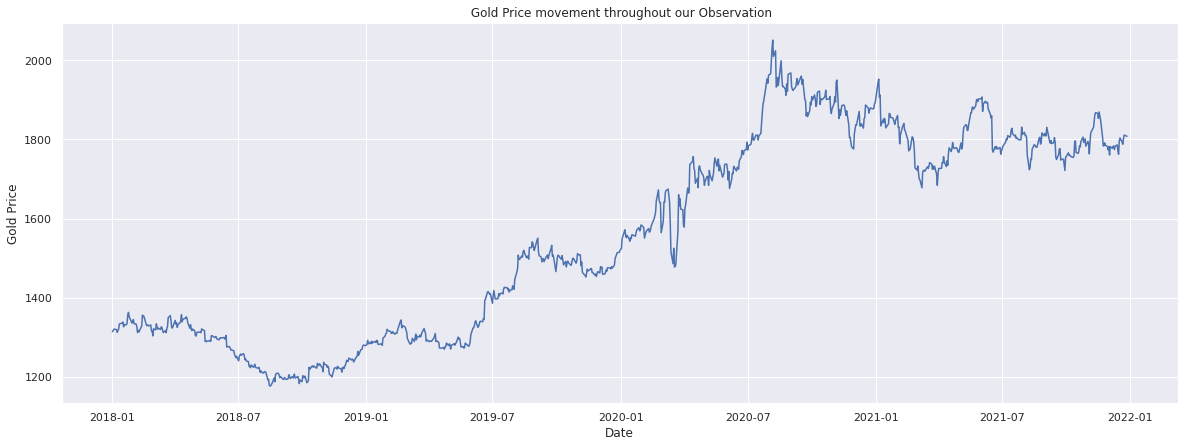

In [80]:
import seaborn as sns
plt.figure(figsize=(20,7))
sns.set(style='darkgrid')
sns.lineplot( y="Price", x="Date", data=data)
#sns.lineplot( y="Price", x=data.index, data=data)
plt.title(" Gold Price movement throughout our Observation")
plt.ylabel('Gold Price')
plt.show()

**Another Way to draw line chart**

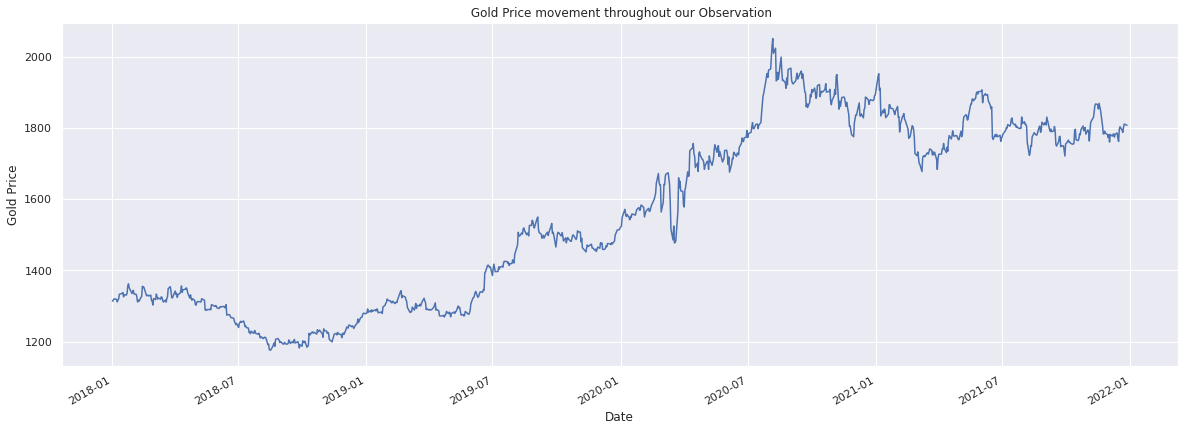

In [81]:
#from IPython.core.pylabtools import figsize
plt.figure(figsize=(20,7))
data.Price.plot()
plt.title(" Gold Price movement throughout our Observation")
plt.ylabel('Gold Price')
plt.show()

In [12]:
#creating a index column
#data = data.reset_index()

In [82]:
data

,Price
Date,
2018-01-02,1313.699951
2018-01-03,1316.199951
2018-01-04,1319.400024
2018-01-05,1320.300049
2018-01-08,1318.599976
...,...
2021-12-20,1793.699951
2021-12-21,1787.900024
2021-12-22,1801.599976


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1004 entries, 2018-01-02 to 2021-12-27
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1004 non-null   float64
dtypes: float64(1)
memory usage: 15.7 KB


In [84]:
data.isnull().sum()

Price    0
dtype: int64

In [85]:
print(len(data))

1004


In [86]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1004.0,1557.793724,249.368962,1176.199951,1311.250031,1526.400024,1791.400024,2051.5


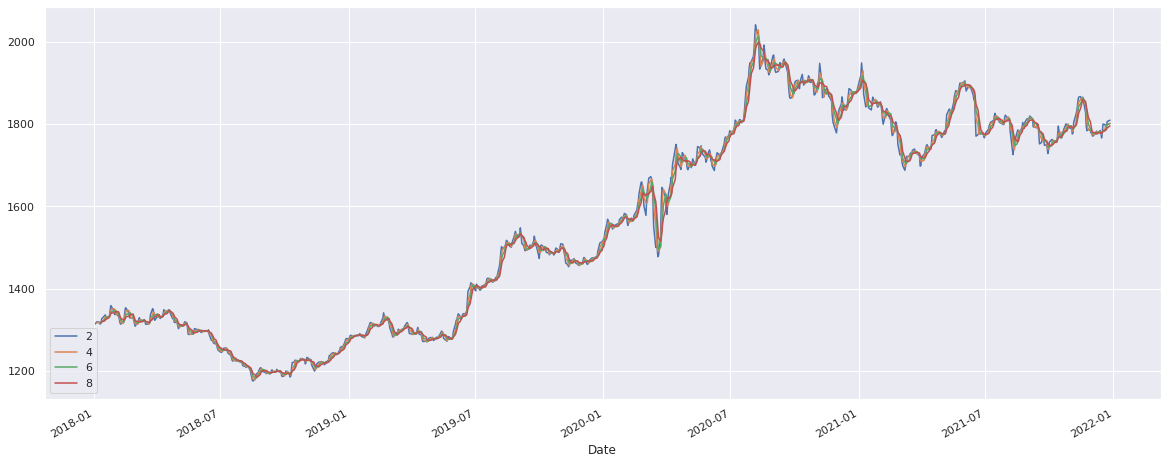

In [88]:
plt.figure(figsize=(20,8))
for i in range(2,10,2):
    data['Price'].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)
plt.show()

In [89]:
df=data.copy()

In [99]:
df=df.reset_index()
df

,Date,Price
0,2018-01-02,1313.699951
1,2018-01-03,1316.199951
2,2018-01-04,1319.400024
3,2018-01-05,1320.300049
4,2018-01-08,1318.599976
...,...,...
999,2021-12-20,1793.699951
1000,2021-12-21,1787.900024
1001,2021-12-22,1801.599976
1002,2021-12-23,1811.199951


In [100]:
data2=df.resample("M",on="Date").mean()

In [101]:
data2.head()

,Price
Date,
2018-01-31,1330.675000
2018-02-28,1330.057881
2018-03-31,1324.238107
2018-04-30,1335.342866
2018-05-31,1302.618170


In [103]:
fig = px.line(data2, x=data2.index, y="Price",title=" Gold Price movement throughout our Observation with Month variation",labels={"x":"Date","Price":"Gold Prices"})
fig.show()

# Time series decomposition plot 

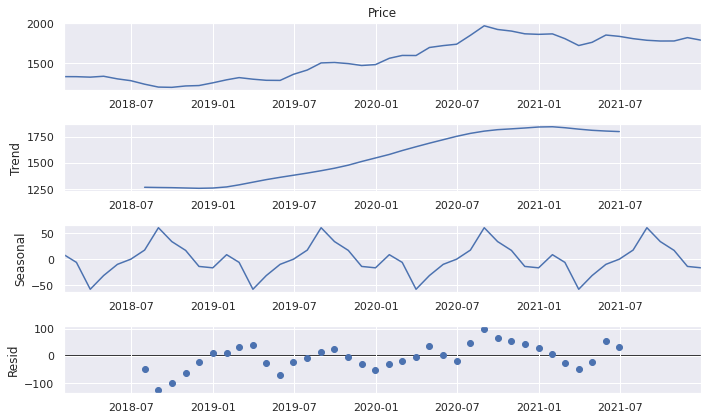

In [104]:
decompose_ts_add =seasonal_decompose(data2['Price'],model='additive')
decompose_ts_add.plot()
plt.show()

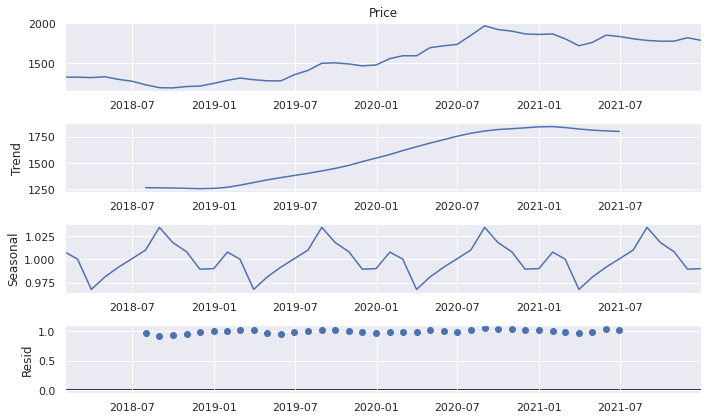

In [105]:
decompose_ts_mul =seasonal_decompose(data2['Price'],model='multiplicable')
decompose_ts_mul.plot()
plt.show()

### **Autocorelation Plot**

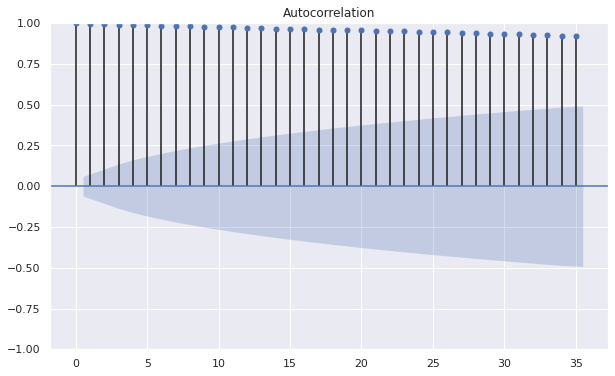

In [106]:
plt.rc("figure", figsize=(10,6))
plot_acf(data['Price'],lags=35)
plt.show()

We can deduct from Auto Correlation Plot that the price of the gold are highly correlated 

### **Partial Auto Correlation Plot**

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



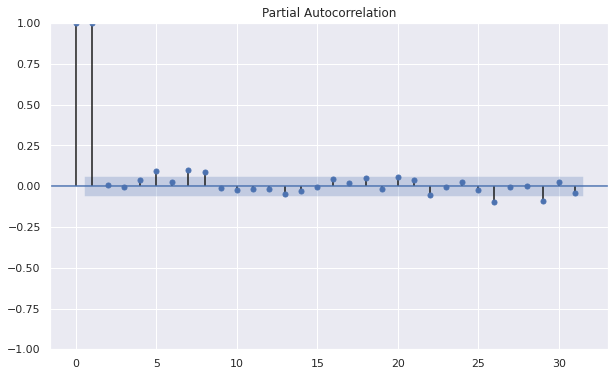

In [109]:
plt.rc("figure", figsize=(10,6))
plot_pacf(data)
plt.show()

### **Checking for Stationarity in data using Dickey-Fuller test**

In [110]:
X = data2['Price'].values

result = adfuller(X)
#print(result)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.784619
p-value: 0.823599
Critical Values:
	1%: -3.585
	5%: -2.928
	10%: -2.602


## **As the p-value > 0.05, we Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.**

## **DIFFERENCE TRANSFORM to remove Seasonality**

In [111]:
data_without_sea = data['Price'] - data['Price'].shift(1)

In [112]:
data_without_sea[1:]

Date
2018-01-03     2.500000
2018-01-04     3.200073
2018-01-05     0.900024
2018-01-08    -1.700073
2018-01-09    -6.900024
                ...    
2021-12-20   -10.100098
2021-12-21    -5.799927
2021-12-22    13.699951
2021-12-23     9.599976
2021-12-27    -3.099976
Name: Price, Length: 1003, dtype: float64

# **Again checking for Stationarity in data using Dickey-Fuller test**

In [33]:
X = data_without_sea[1:].values

result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -14.695934
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


### **Graphs of data after removing the temporal dependence in them.**

In [34]:
fig = px.line(data_without_sea[1:], x=data_without_sea.index[1:], y="Price",title=" Gold Price movement throughout our Observation",labels={"x":"Date","Price":"Gold Prices"})
fig.show()

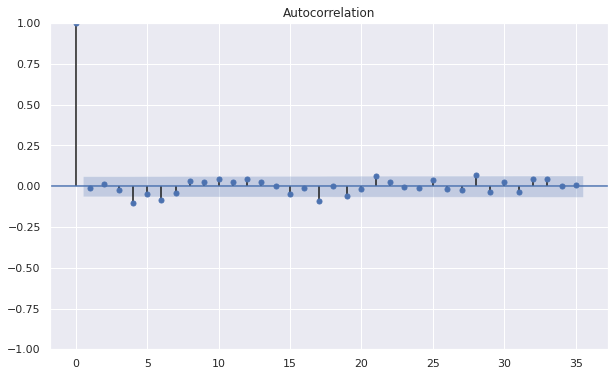

In [35]:
plt.rc("figure", figsize=(10,6))
plot_acf(data_without_sea[1:],lags=35)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



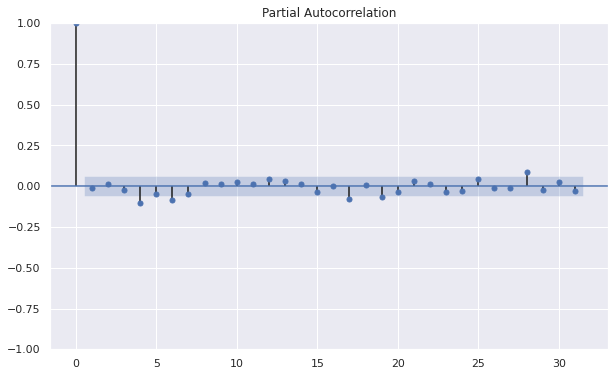

In [36]:
plt.rc("figure", figsize=(10,6))
plot_pacf(data_without_sea[1:])
plt.show()

In [37]:
data_without_sea[1:].count()

1003

In [38]:
df = data[1:]
df

,Date,Price
1,2018-01-03,1316.199951
2,2018-01-04,1319.400024
3,2018-01-05,1320.300049
4,2018-01-08,1318.599976
5,2018-01-09,1311.699951
...,...,...
999,2021-12-20,1793.699951
1000,2021-12-21,1787.900024
1001,2021-12-22,1801.599976
1002,2021-12-23,1811.199951


In [39]:
df['stationary_price'] = data_without_sea[1:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
df['stationary_price']
df

,Date,Price,stationary_price
1,2018-01-03,1316.199951,2.500000
2,2018-01-04,1319.400024,3.200073
3,2018-01-05,1320.300049,0.900024
4,2018-01-08,1318.599976,-1.700073
5,2018-01-09,1311.699951,-6.900024
...,...,...,...
999,2021-12-20,1793.699951,-10.100098
1000,2021-12-21,1787.900024,-5.799927
1001,2021-12-22,1801.599976,13.699951
1002,2021-12-23,1811.199951,9.599976


In [41]:
df2 = df.drop(columns='Price')
df2

,Date,stationary_price
1,2018-01-03,2.500000
2,2018-01-04,3.200073
3,2018-01-05,0.900024
4,2018-01-08,-1.700073
5,2018-01-09,-6.900024
...,...,...
999,2021-12-20,-10.100098
1000,2021-12-21,-5.799927
1001,2021-12-22,13.699951
1002,2021-12-23,9.599976


In [60]:
# separate out a Train dataset

Train =df2.head(803)
Test = df2.tail(200)
print('Dataset %d, Validation %d' % (len(df2), len(df2)))
Train.to_csv('Train_df.csv', header=False)
Test.to_csv('Test_df.csv', header=False)

Dataset 1003, Validation 1003


In [63]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 1 to 803
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              803 non-null    datetime64[ns]
 1   stationary_price  803 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.7 KB


#### Persistence/ Base model

In [69]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('Train_df.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
#small_x = train
X = train.values
#X = X.astype('float32')
#train_size = int(len(X) * 0.50)
#train, test = X[0:train_size], X[train_size:]


In [70]:
train

,1,2
0,,
1,2018-01-03,2.500000
2,2018-01-04,3.200073
3,2018-01-05,0.900024
4,2018-01-08,-1.700073
5,2018-01-09,-6.900024
...,...,...
799,2021-03-09,38.900024
800,2021-03-10,4.900024
801,2021-03-11,0.800049


In [42]:
Train = df2.head(803)
Test = df2.tail(200)

In [43]:
Train

,Date,stationary_price
1,2018-01-03,2.500000
2,2018-01-04,3.200073
3,2018-01-05,0.900024
4,2018-01-08,-1.700073
5,2018-01-09,-6.900024
...,...,...
799,2021-03-09,38.900024
800,2021-03-10,4.900024
801,2021-03-11,0.800049
802,2021-03-12,-2.800049


In [44]:
Test

,Date,stationary_price
804,2021-03-16,1.699951
805,2021-03-17,-3.799927
806,2021-03-18,5.399902
807,2021-03-19,9.200073
808,2021-03-22,-3.599976
...,...,...
999,2021-12-20,-10.100098
1000,2021-12-21,-5.799927
1001,2021-12-22,13.699951
1002,2021-12-23,9.599976


In [45]:
# evaluate a persistence model
from sklearn.metrics import mean_squared_error
from math import sqrt

# prepare data
X = Train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

TypeError: ignored

In [89]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 25.7 MB/s 
     |████████████████████████████████| 9.8 MB 45.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [46]:
from pmdarima import auto_arima

In [47]:

stepwise_fit = auto_arima(Train['stationary_price'], start_p=0, start_q=0,
                          max_p=3, max_q=3, m=12,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   
                          suppress_warnings=True, 
                          stepwise=True)          

stepwise_fit.summary()

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_validation.py:62: UserWarning:

m (12) set for non-seasonal fit. Setting to 0



Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6744.519, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=6746.163, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=6746.193, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=6747.511, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=6745.691, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.385 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  803
Model:                        SARIMAX   Log Likelihood               -3371.259
Date:                Tue, 28 Dec 2021   AIC                           6744.519
Time:                        19:41:29   BIC                           6749.207
Sample:                             0   HQIC                          6746.320
                                - 803                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       259.5071      5.953     43.595      0.000     247.840     271.174
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):              1923.31
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               8.63   Skew:                            -0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""